In [1]:
from pydataset import data
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as mse

import wrangle, split_scale, evaluate

In [2]:
df = data('tips')

df, test = split_scale.split_my_data(df, .8)
df = df[['total_bill', 'tip']]
df.columns = ['x','y']

In [3]:
#2 and 3
model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x)

df['yhat'] = predictions
df['residuals'] = df.yhat - df.y
df['ybar'] = df.y.mean()
df.head()

,x,y,yhat,residuals,ybar
24,39.42,7.58,5.272078,-2.307922,3.021641
191,15.69,1.50,2.576639,1.076639,3.021641
210,12.76,2.23,2.243827,0.013827,3.021641
11,10.27,1.71,1.960993,0.250993,3.021641
197,10.34,2.00,1.968944,-0.031056,3.021641


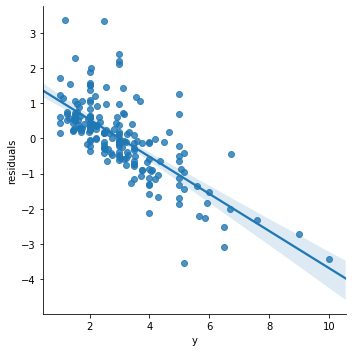

In [4]:
sns.lmplot(x='y', y='residuals', data=df)

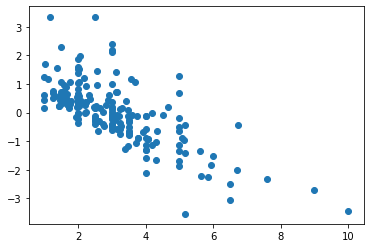

In [5]:
plt.scatter(df.y,df.residuals)
plt.show()

In [6]:
#4
MSE = mse(df.y, df.yhat)
SSE = mse(df.y, df.yhat) * len(df)
ESS = sum((df.yhat - df.y.mean())**2)
TSS = sum((df.y - df.y.mean())**2)
RMSE = sqrt(mse(df.y, df.yhat))

In [7]:
MSE, SSE, ESS, TSS, RMSE

(1.1392577981414729,
 222.15527063758722,
 199.03460423420773,
 421.1898748717951,
 1.06736020074831)

In [8]:
#5
MSE2 = mse(df.y, df.ybar)
SSE2 = mse(df.y, df.ybar) * len(df)
RMSE2 = sqrt(mse(df.y, df.ybar))

In [9]:
print(MSE2,'\n', SSE2, '\n', RMSE2)

2.1599480762656142 
 421.18987487179476 
 1.469676180750581


In [10]:
#6
print(f'''Our baseline prediction for MSE was off by {(MSE2 - MSE):.2f}.
Our baseline prediction for SSE was off by {(SSE2 - SSE):.2f}.
Our baseline prediction for RMSE was off by {(RMSE2 - RMSE):.2f}:.''')

Our baseline prediction for MSE was off by 1.02.
Our baseline prediction for SSE was off by 199.03.
Our baseline prediction for RMSE was off by 0.40:.


In [11]:
#7
r2 = model.rsquared
r2

0.47255315502252127

In [12]:
p = model.f_pvalue
p

1.2857789081391809e-28

Yes, my model is better than the baseline

See python file

In [13]:
#10
df = data('mpg')
df = df[['displ', 'hwy']]
df.columns = ['x','y']
df.head()

,x,y
1,1.8,29
2,1.8,29
3,2.0,31
4,2.0,30
5,2.8,26


In [14]:
df, test = split_scale.split_my_data(df,.8)

model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x)

df['yhat'] = predictions
df['residuals'] = df.yhat - df.y
df.head()

,x,y,yhat,residuals
11,2.0,27,28.961501,1.961501
178,4.0,20,21.509483,1.509483
188,2.2,29,28.216299,-0.783701
27,6.2,25,13.312264,-11.687736
12,2.8,25,25.980694,0.980694


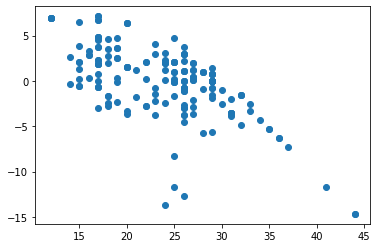

In [15]:
evaluate.plot_residuals(df.y, df.yhat)

In [16]:
evaluate.regression_errors(df.y, df.yhat)

(7048.449197860959,
 4199.347395317911,
 2849.101802543057,
 15.235838516273033,
 3.903311224623657)

In [17]:
evaluate.better_than_baseline(df.y, df.yhat)

True: 22.46 is greater than 0


In [18]:
evaluate.model_significance(model)

(0.5957831683872118, 3.093803995100023e-38)